In [ ]:
# Example plots of pressure data Hybrid Dune Campaign

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [23]:
nc_raw = r'O:\HybridDune experiment\data RBR, OSSI\netcdf\raw NetCDF\Deployment period 1\Pressure sensor S3P3 RBR6 raw data - period 1.nc'
nc_QC  = r'O:\HybridDune experiment\data RBR, OSSI\netcdf\QC\Deployment period 1\Pressure sensor S3P3 RBR6 p_rel - period 1.nc'
nc_processed = r'O:\HybridDune experiment\data RBR, OSSI\netcdf\processed\Deployment period 1\Pressure sensor S3P3 RBR6 processed data - period 1.nc'

ds_raw = xr.open_dataset(nc_raw)
ds_QC = xr.open_dataset(nc_QC)
ds_processed = xr.open_dataset(nc_processed)

ds_processed # print the variables in ds_processed

<xarray.Dataset> Size: 543MB
Dimensions:      (t_zb: 3, t_full: 8409600, t_block: 438, f: 480)
Coordinates:
  * t_zb         (t_zb) datetime64[ns] 24B 2024-12-17T10:30:00 ... 2024-12-23...
  * t_full       (t_full) datetime64[ns] 67MB 2024-12-17T11:00:00 ... 2024-12...
  * t_block      (t_block) datetime64[ns] 4kB 2024-12-17T11:00:00 ... 2024-12...
  * f            (f) float64 4kB 0.0 0.01667 0.03333 0.05 ... 7.95 7.967 7.983
Data variables: (12/43)
    zb           (t_zb) float64 24B ...
    t_zi         datetime64[ns] 8B ...
    zi           float64 8B ...
    x_RD         float64 8B ...
    y_RD         float64 8B ...
    x_local      float64 8B ...
    ...           ...
    Tm02_WW      (t_block) float64 4kB ...
    Tmm10_WW     (t_block) float64 4kB ...
    Tps_WW       (t_block) float64 4kB ...
    Sk           (t_block) float64 4kB ...
    As           (t_block) float64 4kB ...
    sigma        (t_block) float64 4kB ...
Attributes: (12/17)
    Conventions:               CF-1.6
    name:                      Pressure sensor S3P3 RBR, period 1
    instrument:                Pressure sensor S3P3 RBR6
    instrument type:           Ruskin RBR Solo
    instrument serial number:  208682
    epsg:                      28992
    ...                        ...
    emailadres:                d.w.poppema@tudelft.nl
    construction datetime:     09-Sep-2025 17:13:57
    version:                   v1
    comment_1:                 subscripts IG and WW in variable names refer t...
    url of online dataset:     ADD LATER
    comment_2:                 constructed with xarray

Text(0.5, 1.0, 'Pressure sensor S3P3 RBR6, Deployment period 1')

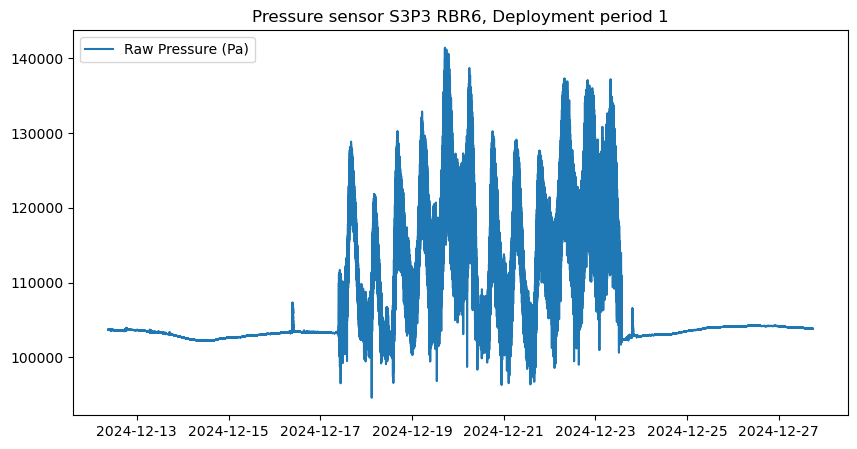

In [25]:
# plot raw data
plt.figure(figsize=(10, 5))
plt.plot(ds_raw.t, ds_raw.p, label='Raw Pressure (Pa)')
plt.legend(loc="upper left")
plt.title(ds_raw.attrs['instrument'] + ', Deployment period 1') # Use metadata from netcdf for title


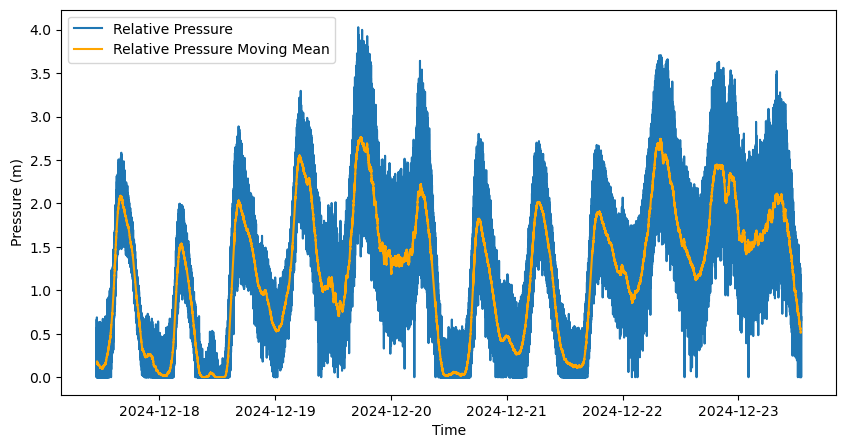

In [4]:
# plot QC data

# determine moving mean of ds_QC.p
p = ds_QC.p_rel/10000 # convert to m
window_size = ds_QC.sf.values * 60 * 10  # window size: 16 hz * 60s * 10min
p_moving_mean = p.rolling(t=window_size, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(ds_QC.t, p, label='Relative Pressure')
plt.plot(ds_QC.t, p_moving_mean, label='Relative Pressure Moving Mean', color='orange')
plt.xlabel('Time')
plt.ylabel('Pressure (m)')
plt.legend(loc="upper left")

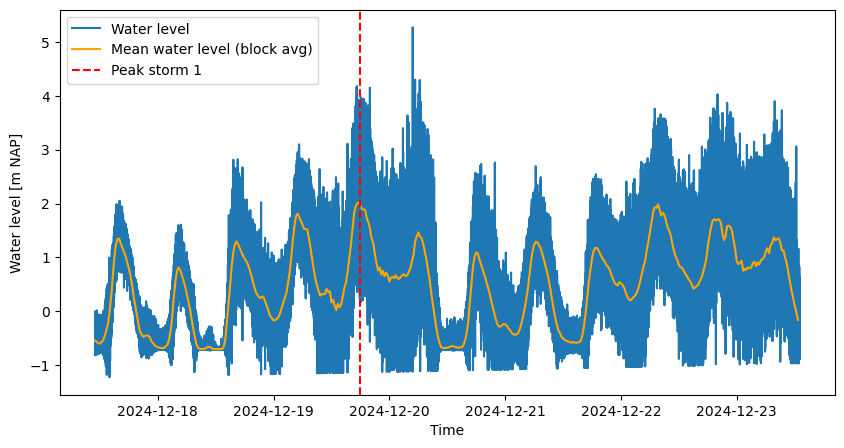

In [48]:
# plot processed data: timeseries
plt.figure(figsize=(10, 5))
plt.plot(ds_processed.t_full, ds_processed.zs, label='Water level')
plt.plot(ds_processed.t_block, ds_processed.zs_mean, label='Mean water level (block avg)', color='orange') # block averaged water level, so per 20 minutes
plt.axvline(pd.Timestamp('2024-12-19 18:00'), color='red', linestyle='--', label='Peak storm 1') # manually plot line at 19 dec, 18:00

plt.xlabel('Time')
plt.ylabel('Water level [m NAP]')
plt.legend(loc="upper left")



(0.0, 1.0)

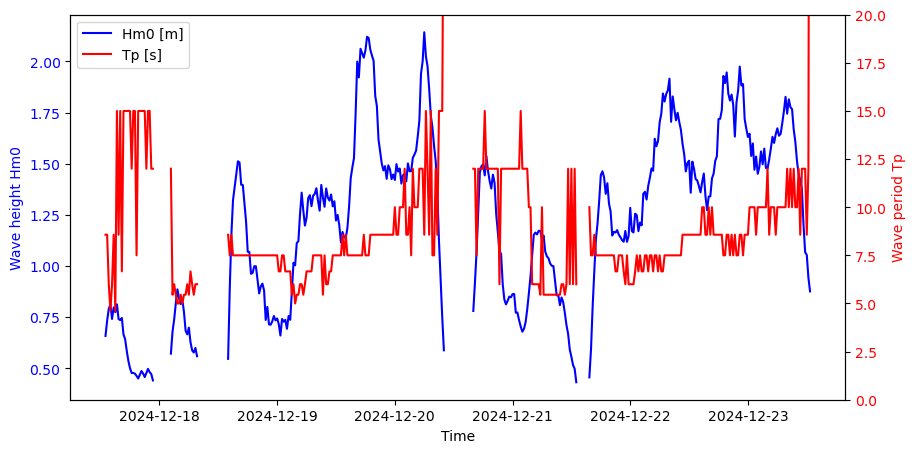

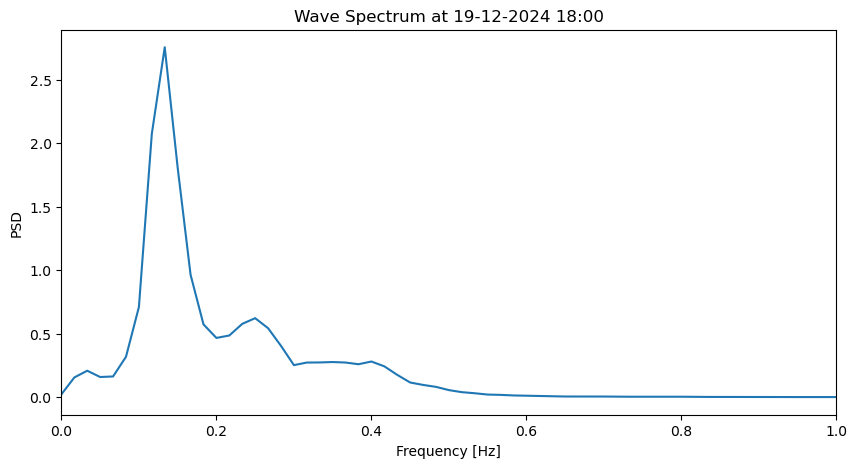

In [44]:
# Plot processed data: wave spectrum and wave statistics
plt.figure(figsize=(10, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()

line1, = ax1.plot(ds_processed.t_block, ds_processed.Hm0, label='Hm0 [m]', color='blue')
line2, = ax2.plot(ds_processed.t_block, ds_processed.Tp, label='Tp [s]', color='red')

ax1.set_ylabel('Wave height Hm0', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel('Wave period Tp', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

ax1.set_xlabel('Time')
ax2.set_ylim(0, 20)

# Plot wave spectrum
psd = ds_processed.psd.sel(t_block=pd.Timestamp('2024-12-19 18:00'))
frequencies = ds_processed.f

plt.figure(figsize=(10, 5))
plt.plot(frequencies, psd)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
time_str = pd.to_datetime(psd.t_block.values).strftime('%d-%m-%Y %H:%M')
plt.title(f'Wave Spectrum at {time_str}')
plt.xlim(0, 1)